<a href="https://colab.research.google.com/github/lmcanavals/data_mining/blob/main/notebooks/ec_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


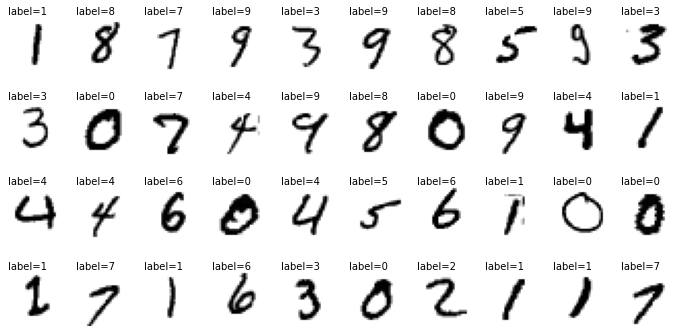

In [ ]:
fig = plt.figure(figsize=(12, 6))
for i, image in enumerate(x_train[40:80]):
  a = fig.add_subplot(4, 10, i + 1)
  plt.axis('off')
  plt.imshow(image, cmap='gray_r')
  plt.text(0, 0, f"label={y_train[i+40]}")
plt.show()

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

Images are 28 pixels wide and 28 pixels high, we trainsform to 28x28x1 to include channel information, since these are grayscale images, we only have 1 channel.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
model = Sequential([Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(32, kernel_size=(3, 3)),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3381 - accuracy: 0.8960
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0417 - accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0220 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 44s 24m

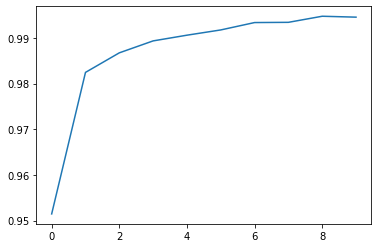

In [ ]:
plt.plot(history.history['accuracy'])

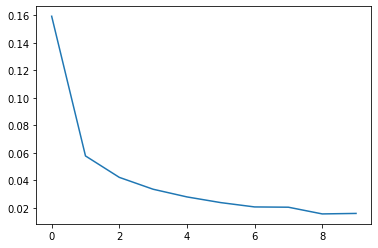

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0492 - accuracy: 0.9890


[0.04923439025878906, 0.9890000224113464]